In [62]:
import numpy as np
import pandas as pd
import pdpipe as pdp

import shapely
#import geopandas as gpd

import seaborn as sns
import folium

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
taxis_green = pd.read_csv("../fulldata/nyc_green_taxi.csv")
taxis_green_orig = taxis_green
taxis_green.head()

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_location_id,dropoff_location_id,total_amount,trip_type
0,08-25-13 03:04:20,08-25-13 03:08:40,5,1.21,-73.915627,40.757450,-73.914749,40.744560,NaN,NaN,7.00,NaN
1,08-30-13 23:43:49,08-31-13 00:09:25,4,4.70,-73.997772,40.683205,-73.951752,40.689156,NaN,NaN,26.25,NaN
2,08-24-13 14:20:06,08-24-13 14:33:07,1,3.54,-73.857964,40.834431,-73.890465,40.858604,NaN,NaN,14.00,NaN
3,08-26-13 12:04:02,08-26-13 12:04:10,5,0.00,-73.902092,40.764004,-73.902061,40.763992,NaN,NaN,0.00,NaN
4,08-22-13 00:20:45,08-22-13 00:34:36,6,2.73,-73.954346,40.730366,-73.925476,40.698238,NaN,NaN,12.50,NaN


In [11]:
taxis_yellow = pd.read_csv("../fulldata/nyc_yellow_taxi.csv")
taxis_yellow_orig = taxis_yellow
taxis_yellow.head()

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_location_id,dropoff_location_id,total_amount
0,06-29-13 08:19:47,06-29-13 08:28:17,2,1.70,-73.995376,40.739316,-74.000997,40.721095,NaN,NaN,10.0
1,06-06-13 14:17:18,06-06-13 14:44:42,1,2.30,-73.977356,40.754204,-74.002716,40.734031,NaN,NaN,18.0
2,06-29-13 20:46:00,06-29-13 20:59:00,2,4.58,-73.966770,40.804120,-73.991645,40.758342,NaN,NaN,17.0
3,06-25-13 09:50:00,06-25-13 10:09:00,1,2.84,-73.960547,40.760512,-73.991325,40.751655,NaN,NaN,18.5
4,06-29-13 08:42:00,06-29-13 08:52:00,1,2.63,-74.004345,40.707710,-73.997462,40.736542,NaN,NaN,11.0


In [12]:
pipe = pdp.ColDrop("total_amount")
pipe += pdp.ColDrop("trip_type")
pipe += pdp.DropNa(subset=["pickup_location_id","dropoff_location_id"])
#pipe += pdp.RowDrop({"tripduration": lambda t : t<60})

taxis_green = pipe(taxis_green)

FailedPreconditionError: Pipeline stage failed because not all columns total_amount were found in the input dataframe.

In [13]:
pipe = pdp.ColDrop("total_amount")
pipe += pdp.DropNa(subset=["pickup_location_id","dropoff_location_id"])

taxis_yellow = pipe(taxis_yellow)

In [25]:
pipe = pdp.ColDrop("pickup_longitude")
pipe += pdp.ColDrop("pickup_latitude")
pipe += pdp.ColDrop("dropoff_longitude")
pipe += pdp.ColDrop("dropoff_latitude")

FailedPreconditionError: Pipeline stage failed because not all columns pickup_longitude were found in the input dataframe.

In [26]:
pipe = pdp.RowDrop({"pickup_location_id": lambda id : id < 1 or id > 263})
pipe += pdp.RowDrop({"dropoff_location_id": lambda id : id < 1 or id > 263})

taxis_green = pipe(taxis_green)
taxis_yellow = pipe(taxis_yellow)

In [27]:
taxis_green.head()

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_location_id,dropoff_location_id,trip_type
2264980,07-19-16 15:59:24,07-19-16 16:05:54,1,1.19,75.0,74.0,1.0
2264981,07-01-16 12:26:54,07-01-16 12:29:19,1,0.37,244.0,116.0,1.0
2264982,07-20-16 15:23:39,07-20-16 15:40:25,1,7.00,145.0,138.0,1.0
2264983,07-01-16 10:19:07,07-01-16 10:32:14,1,2.09,75.0,41.0,1.0
2264984,07-02-16 16:58:41,07-02-16 17:01:04,1,0.55,236.0,236.0,1.0


In [28]:
taxis_yellow.head()

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_location_id,dropoff_location_id
4789124,07-07-16 22:40:43,07-07-16 23:01:01,2,4.71,234.0,238.0
4789125,07-23-16 20:21:11,07-23-16 20:25:40,2,1.20,163.0,141.0
4789126,07-29-16 01:20:40,07-29-16 01:52:39,1,5.40,249.0,249.0
4789127,07-09-16 17:46:23,07-09-16 17:52:24,1,0.70,13.0,231.0
4789128,07-22-16 20:43:58,07-22-16 21:15:19,2,4.30,43.0,249.0


In [29]:
tlc_zones = pd.read_csv("../fulldata/legends/tlc_zones.csv")
tlc_zones.head()

,location_id,borough,zone,service_zone,nta_code
0,1,EWR,Newark Airport,EWR,NJ01
1,2,Queens,Jamaica Bay,Boro Zone,QN61
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone,BX31
3,4,Manhattan,Alphabet City,Yellow Zone,MN22
4,5,Staten Island,Arden Heights,Boro Zone,SI48


In [36]:
#nta_hash = dict(zip(tlc_zones.location_id, tlc_zones.nta_code))

taxis_green['pickup_nta'] = taxis_green.apply(lambda row: nta_hash[row.pickup_location_id], axis=1)
taxis_green['dropoff_nta'] = taxis_green.apply(lambda row: nta_hash[row.dropoff_location_id], axis=1)
taxis_yellow['pickup_nta'] = taxis_yellow.apply(lambda row: nta_hash[row.pickup_location_id], axis=1)
taxis_yellow['dropoff_nta'] = taxis_yellow.apply(lambda row: nta_hash[row.dropoff_location_id], axis=1)

In [37]:
taxis_green.tail()

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_location_id,dropoff_location_id,trip_type,pickup_nta,dropoff_nta
3825653,06-06-19 15:26:11,06-06-19 15:37:58,1,3.20,129.0,138.0,1.0,QN28,QN98
3825654,06-15-19 22:45:07,06-15-19 23:03:23,2,4.00,181.0,255.0,1.0,BK37,BK73
3825655,06-29-19 16:42:47,06-29-19 17:03:05,1,4.49,196.0,7.0,1.0,QN18,QN70
3825656,06-06-19 18:42:22,06-06-19 18:53:00,1,2.30,40.0,257.0,1.0,BK33,BK40
3825657,06-21-19 20:04:53,06-21-19 20:05:12,1,0.00,25.0,25.0,2.0,BK38,BK38


In [38]:
taxis_yellow.tail()

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_location_id,dropoff_location_id,pickup_nta,dropoff_nta
8014306,06-14-19 11:44:21,06-14-19 11:56:46,2,1.30,170.0,113.0,MN20,MN23
8014307,06-09-19 07:38:15,06-09-19 07:51:56,1,4.40,263.0,113.0,MN32,MN23
8014308,06-20-19 07:25:00,06-20-19 07:37:25,1,2.85,236.0,161.0,MN40,MN17
8014309,06-12-19 22:46:24,06-12-19 22:53:39,1,1.42,114.0,170.0,MN23,MN20
8014310,06-30-19 19:26:55,06-30-19 19:46:27,1,3.70,163.0,226.0,MN17,QN31


In [39]:
taxis_green.to_csv('nyc_green_cleaned.csv')
taxis_yellow.to_csv('nyc_yellow_cleaned.csv')

In [41]:
taxis_green['pickup_datetime'] = pd.to_datetime(taxis_green['pickup_datetime'])

In [56]:
#grp_t_grn = taxis_green.groupby(taxis_green['pickup_datetime'].dt.to_period('Q'))
g_m = grp_t_grn.mean()[3:15]

In [47]:
taxis_yellow['pickup_datetime'] = pd.to_datetime(taxis_yellow['pickup_datetime'])

In [80]:
#grp_t_yel = taxis_yellow.groupby(taxis_yellow['pickup_datetime'].dt.to_period('Q'))
y_m = grp_t_yel.mean()[3:15]
y_m

,passenger_count,trip_distance,pickup_location_id,dropoff_location_id
pickup_datetime,,,,
2016Q3,1.646648,3.054387,160.121807,158.026979
2016Q4,1.648510,2.933342,161.421801,159.072703
2017Q1,1.627492,2.822656,161.885317,159.460570
2017Q2,1.630257,2.948534,161.596871,159.284842
2017Q3,1.635462,2.999365,160.142681,158.200020
2017Q4,1.622822,2.884045,162.087919,160.130474
2018Q1,1.603445,2.776855,161.759396,159.837093
2018Q2,1.600339,2.948246,161.517156,159.756925
2018Q3,1.601787,2.979342,160.383281,158.388830


In [81]:
y_m.reset_index(inplace=True)

[Text(0, 0, '2016Q3'),
 Text(0, 0, '2016Q4'),
 Text(0, 0, '2017Q1'),
 Text(0, 0, '2017Q2'),
 Text(0, 0, '2017Q3'),
 Text(0, 0, '2017Q4'),
 Text(0, 0, '2018Q1'),
 Text(0, 0, '2018Q2'),
 Text(0, 0, '2018Q3'),
 Text(0, 0, '2018Q4'),
 Text(0, 0, '2019Q1'),
 Text(0, 0, '2019Q2')]

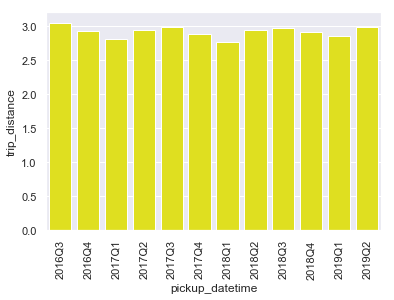

In [93]:
sns.set()
chart = sns.barplot(x='pickup_datetime', y='trip_distance', data=y_m, color='yellow')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

In [86]:
g_m.reset_index(inplace=True)

[Text(0, 0, '2016Q3'),
 Text(0, 0, '2016Q4'),
 Text(0, 0, '2017Q1'),
 Text(0, 0, '2017Q2'),
 Text(0, 0, '2017Q3'),
 Text(0, 0, '2017Q4'),
 Text(0, 0, '2018Q1'),
 Text(0, 0, '2018Q2'),
 Text(0, 0, '2018Q3'),
 Text(0, 0, '2018Q4'),
 Text(0, 0, '2019Q1'),
 Text(0, 0, '2019Q2')]

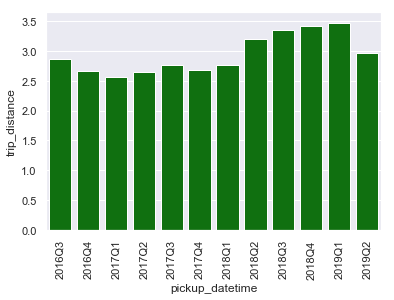

In [118]:
chart = sns.barplot(x='pickup_datetime', y='trip_distance', data=g_m, color='green')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

[Text(0, 0, '2016Q3'),
 Text(0, 0, '2016Q4'),
 Text(0, 0, '2017Q1'),
 Text(0, 0, '2017Q2'),
 Text(0, 0, '2017Q3'),
 Text(0, 0, '2017Q4'),
 Text(0, 0, '2018Q1'),
 Text(0, 0, '2018Q2'),
 Text(0, 0, '2018Q3'),
 Text(0, 0, '2018Q4'),
 Text(0, 0, '2019Q1'),
 Text(0, 0, '2019Q2')]

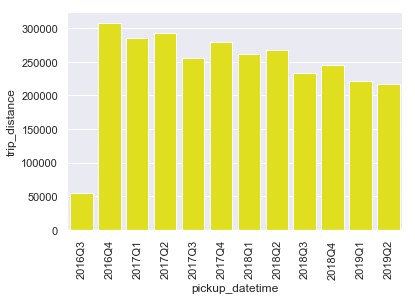

In [119]:
y_c = grp_t_yel.count()[3:15]
y_c = y_c.drop('pickup_datetime', axis=1)
y_c.reset_index(inplace=True)
chart = sns.barplot(x='pickup_datetime', y='trip_distance', data=y_c, color='yellow')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

[Text(0, 0, '2016Q3'),
 Text(0, 0, '2016Q4'),
 Text(0, 0, '2017Q1'),
 Text(0, 0, '2017Q2'),
 Text(0, 0, '2017Q3'),
 Text(0, 0, '2017Q4'),
 Text(0, 0, '2018Q1'),
 Text(0, 0, '2018Q2'),
 Text(0, 0, '2018Q3'),
 Text(0, 0, '2018Q4'),
 Text(0, 0, '2019Q1'),
 Text(0, 0, '2019Q2')]

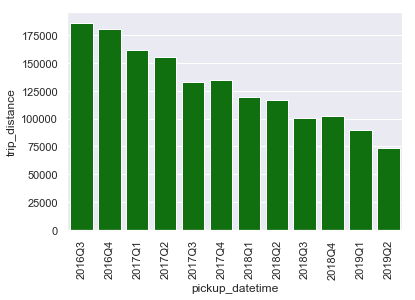

In [120]:
g_c = grp_t_grn.count()[3:15]
g_c = g_c.drop('pickup_datetime', axis=1)
g_c.reset_index(inplace=True)
chart = sns.barplot(x='pickup_datetime', y='trip_distance', data=g_c, color='green')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)